## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Collecting Data and Analysing

In [2]:
pokerdata_train=pd.read_csv('poker-hand-training-true.csv', names = ["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","Class"])
pokerdata_test = pd.read_csv('poker-hand-testing.csv', names = ["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","Class"])

In [3]:
pokerdata_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
pokerdata_test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [13]:
pokerdata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  Class   25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [14]:
pokerdata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1000000 non-null  int64
 1   C1      1000000 non-null  int64
 2   S2      1000000 non-null  int64
 3   C2      1000000 non-null  int64
 4   S3      1000000 non-null  int64
 5   C3      1000000 non-null  int64
 6   S4      1000000 non-null  int64
 7   C4      1000000 non-null  int64
 8   S5      1000000 non-null  int64
 9   C5      1000000 non-null  int64
 10  Class   1000000 non-null  int64
dtypes: int64(11)
memory usage: 83.9 MB


In [15]:
pokerdata_train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [16]:
pokerdata_test.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [17]:
pokerdata_train.shape

(25010, 11)

In [18]:
pokerdata_test.shape

(1000000, 11)

## Data Visualization

<AxesSubplot:xlabel='Class', ylabel='count'>

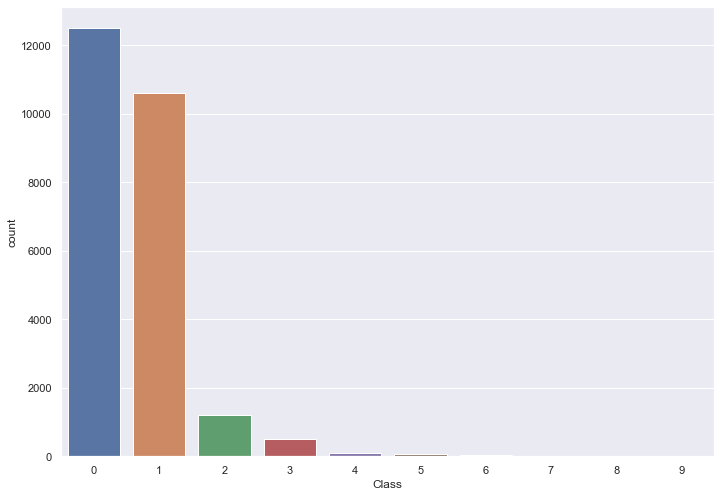

In [19]:
sns.countplot(x = pokerdata_train['Class'])

<AxesSubplot:xlabel='Class', ylabel='count'>

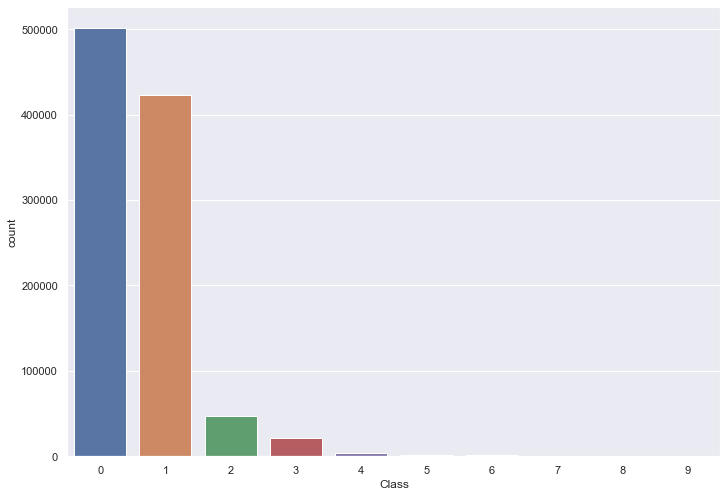

In [20]:
sns.countplot(x = pokerdata_test['Class'])

array([[<AxesSubplot:title={'center':'S1'}>,
        <AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'S2'}>],
       [<AxesSubplot:title={'center':'C2'}>,
        <AxesSubplot:title={'center':'S3'}>,
        <AxesSubplot:title={'center':'C3'}>],
       [<AxesSubplot:title={'center':'S4'}>,
        <AxesSubplot:title={'center':'C4'}>,
        <AxesSubplot:title={'center':'S5'}>],
       [<AxesSubplot:title={'center':'C5'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

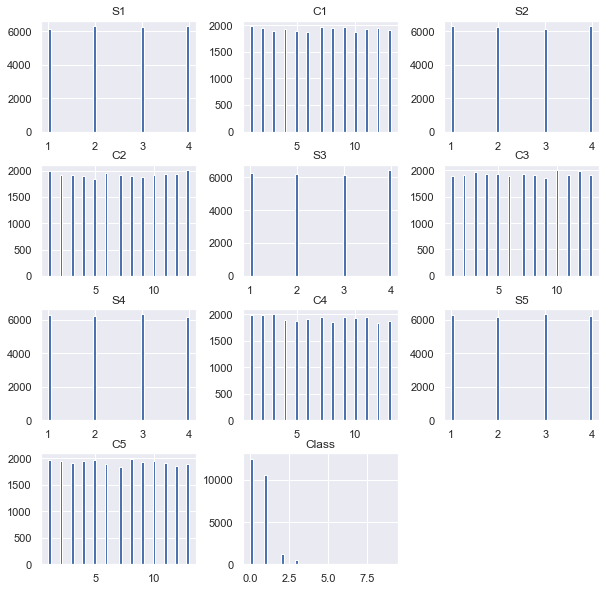

In [21]:
pokerdata_train.hist(figsize=(10,10),bins=50)

array([[<AxesSubplot:title={'center':'S1'}>,
        <AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'S2'}>],
       [<AxesSubplot:title={'center':'C2'}>,
        <AxesSubplot:title={'center':'S3'}>,
        <AxesSubplot:title={'center':'C3'}>],
       [<AxesSubplot:title={'center':'S4'}>,
        <AxesSubplot:title={'center':'C4'}>,
        <AxesSubplot:title={'center':'S5'}>],
       [<AxesSubplot:title={'center':'C5'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

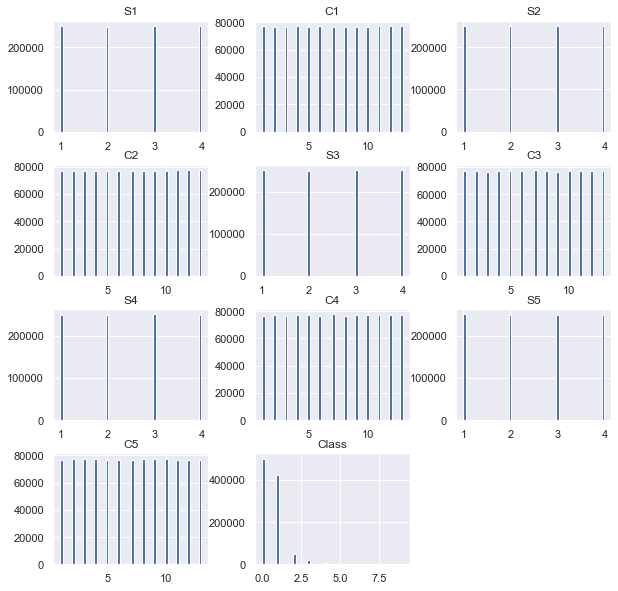

In [22]:
pokerdata_test.hist(figsize=(10,10),bins=50)

C:\Users\abhij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhij\anaconda3\lib\si

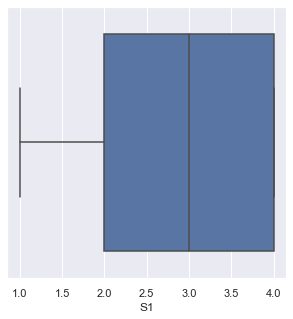

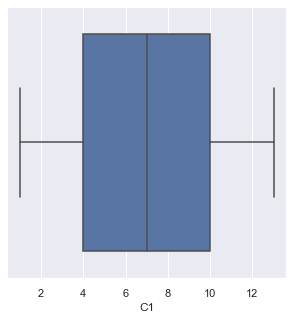

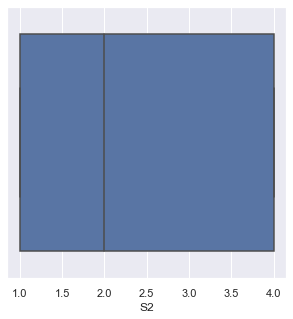

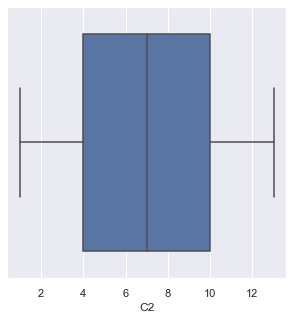

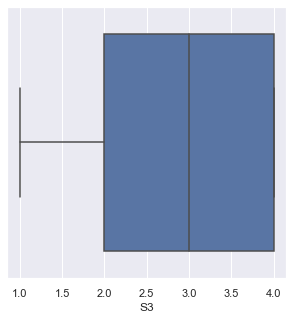

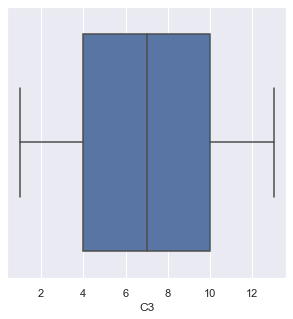

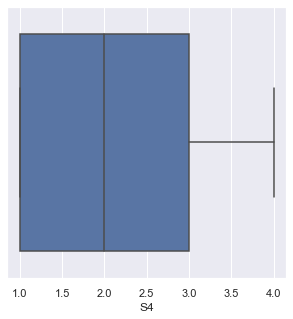

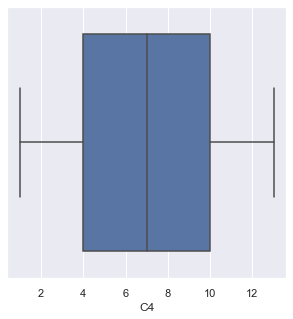

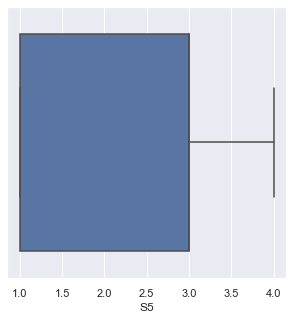

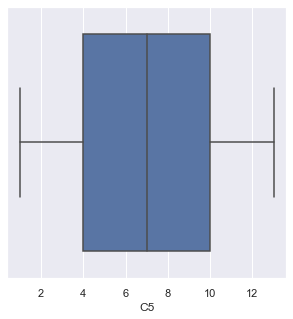

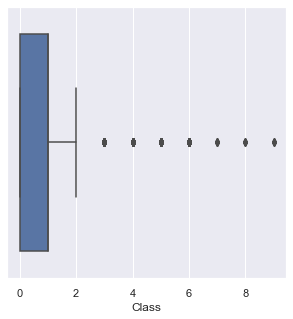

In [23]:
for i in pokerdata_train.columns:
    plt.subplots(figsize=(5,5))
    sns.boxplot(pokerdata_train[i])

C:\Users\abhij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhij\anaconda3\lib\si

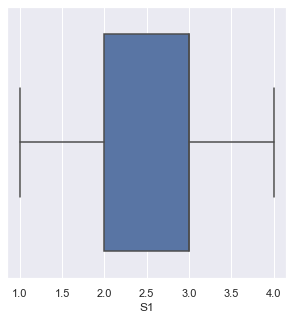

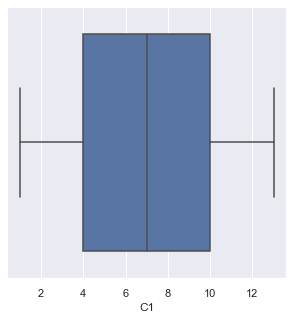

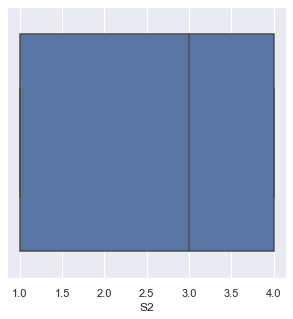

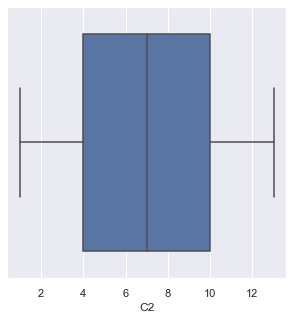

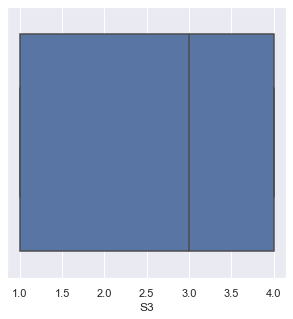

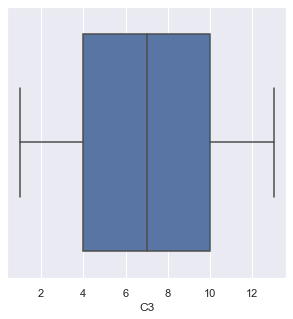

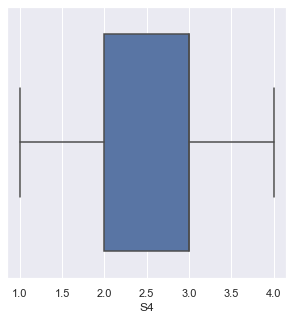

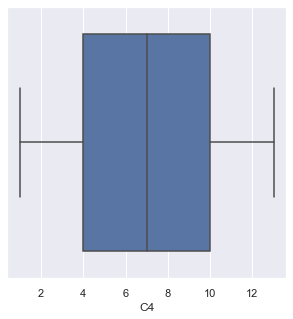

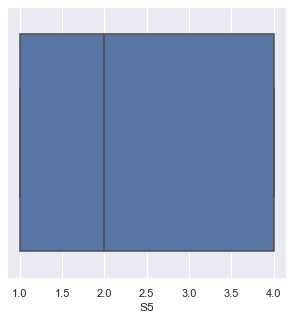

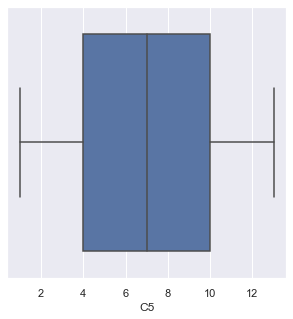

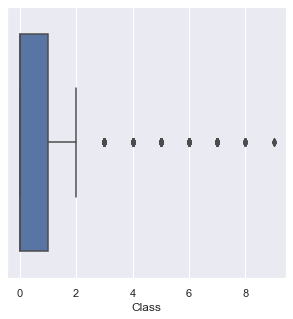

In [24]:
for i in pokerdata_test.columns:
    plt.subplots(figsize=(5,5))
    sns.boxplot(pokerdata_test[i])

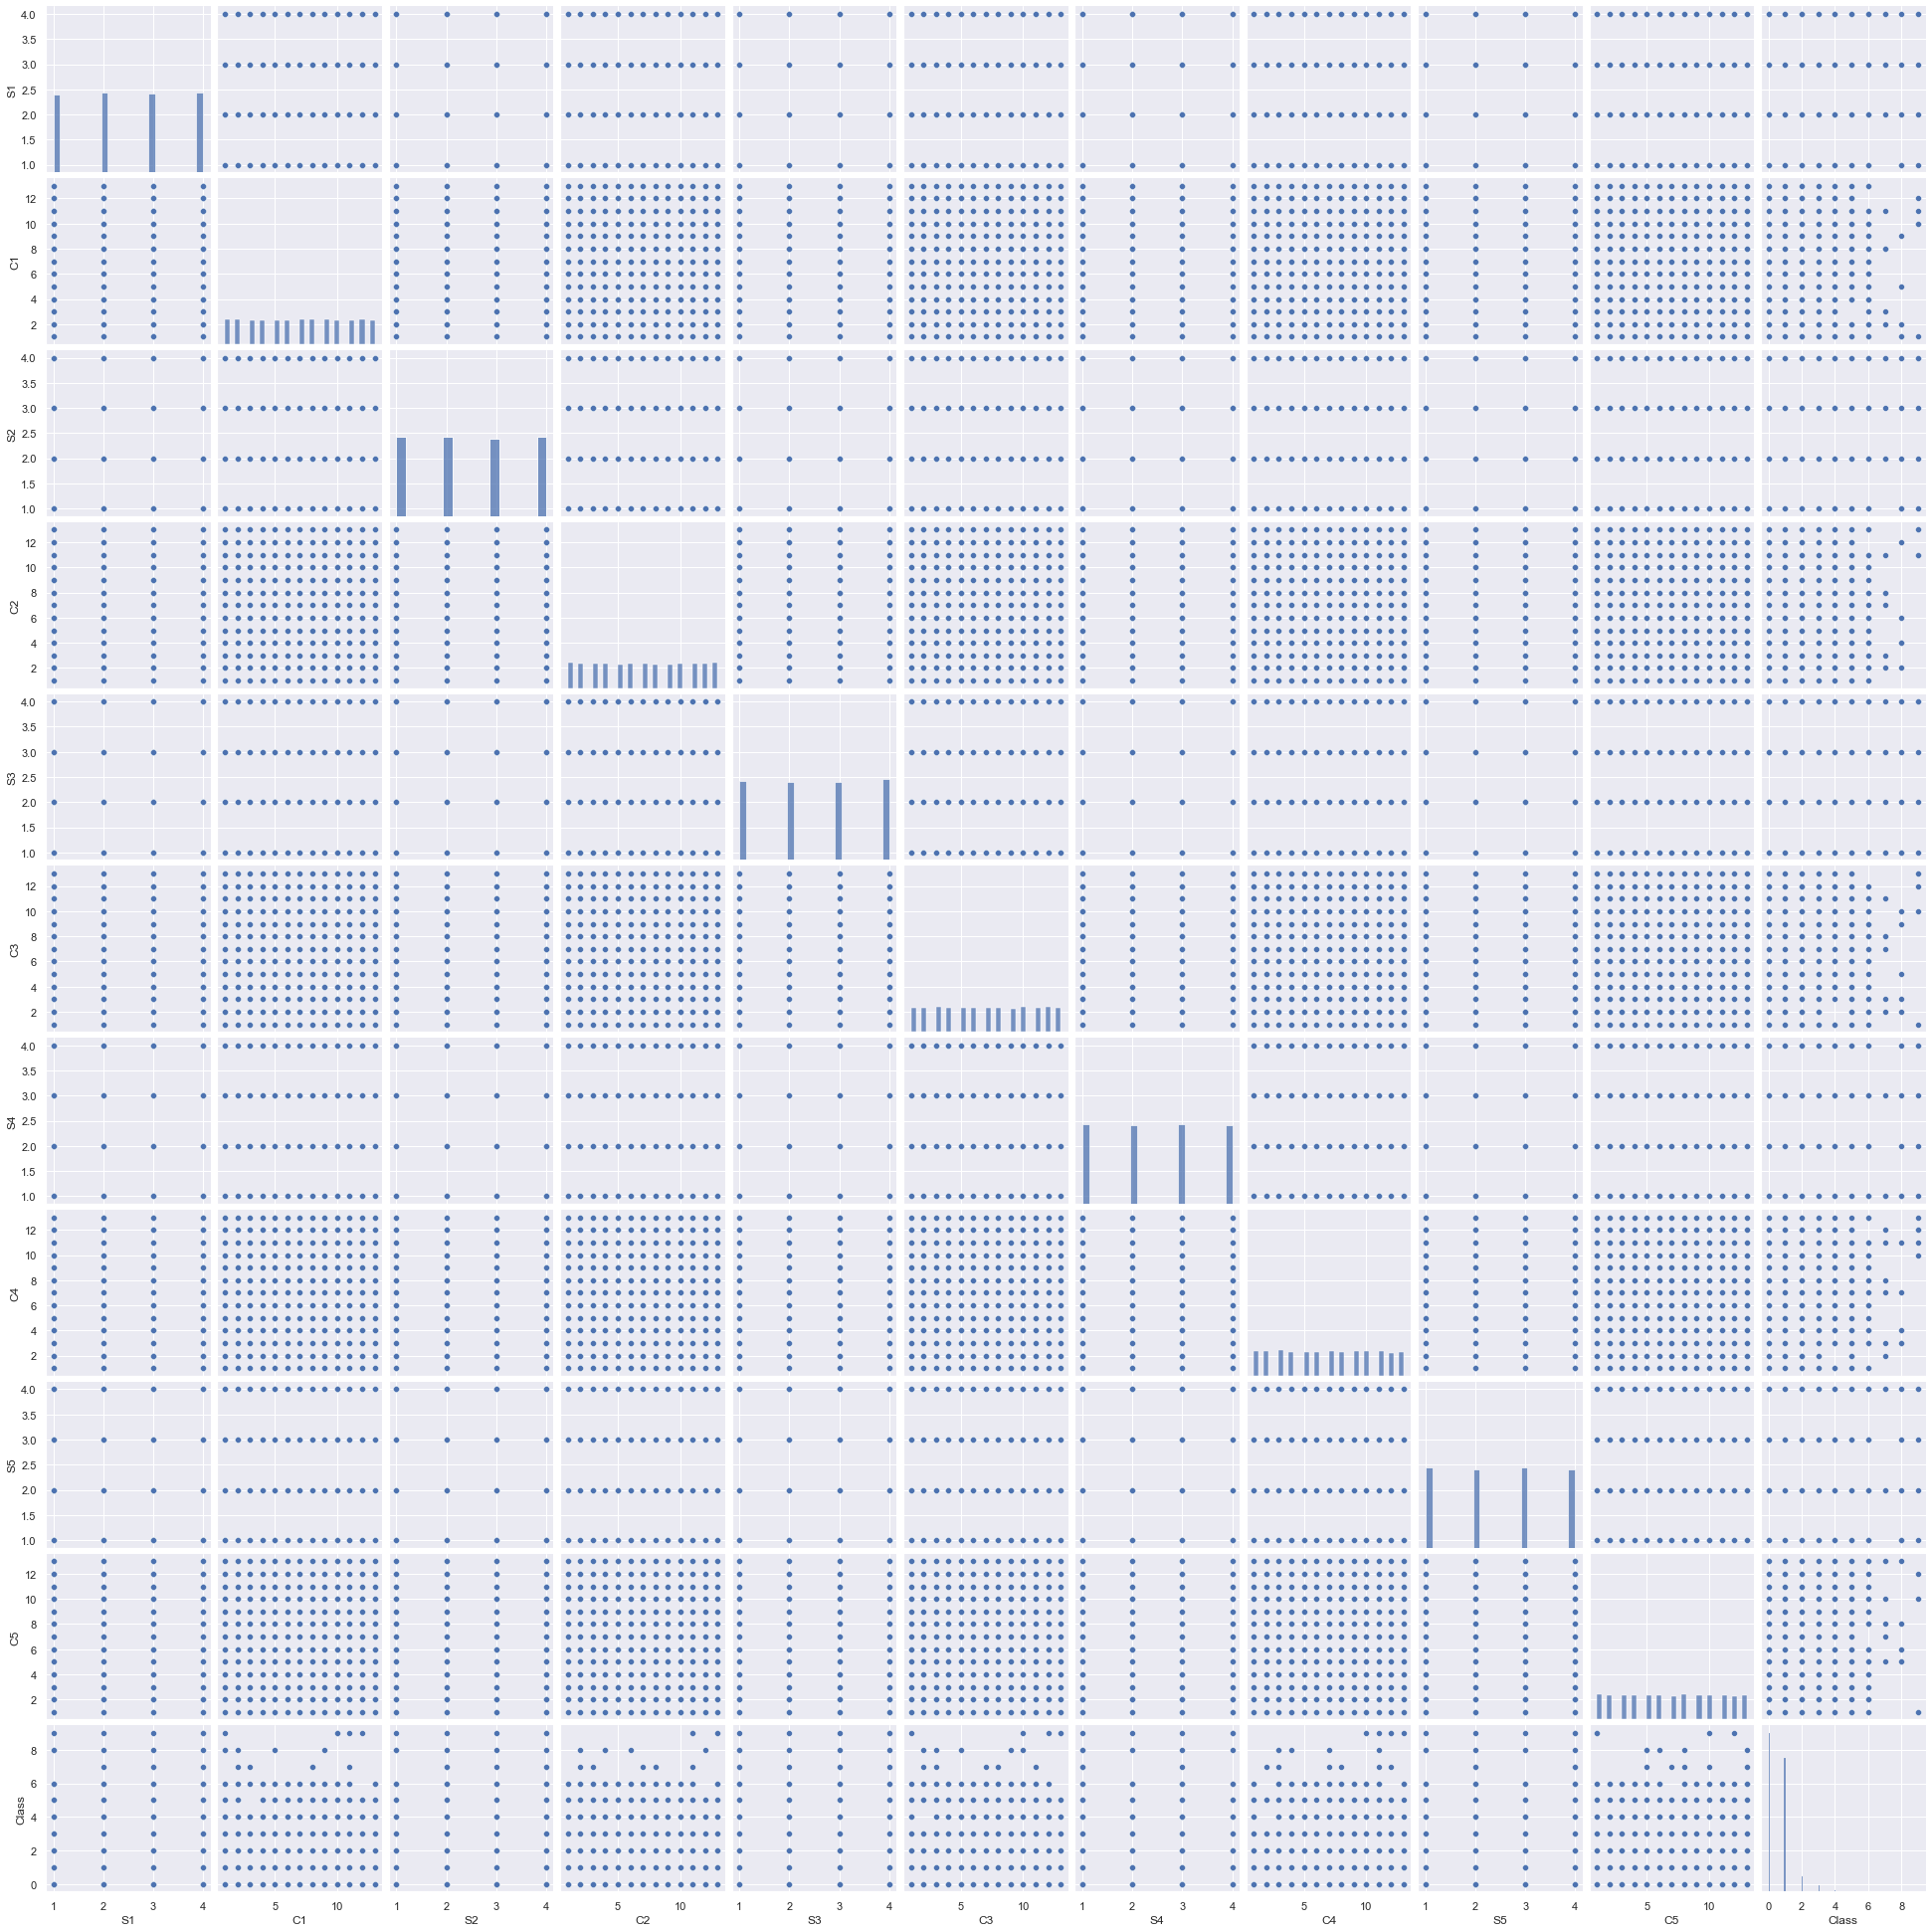

In [25]:
sns.pairplot(pokerdata_train[pokerdata_train.columns])

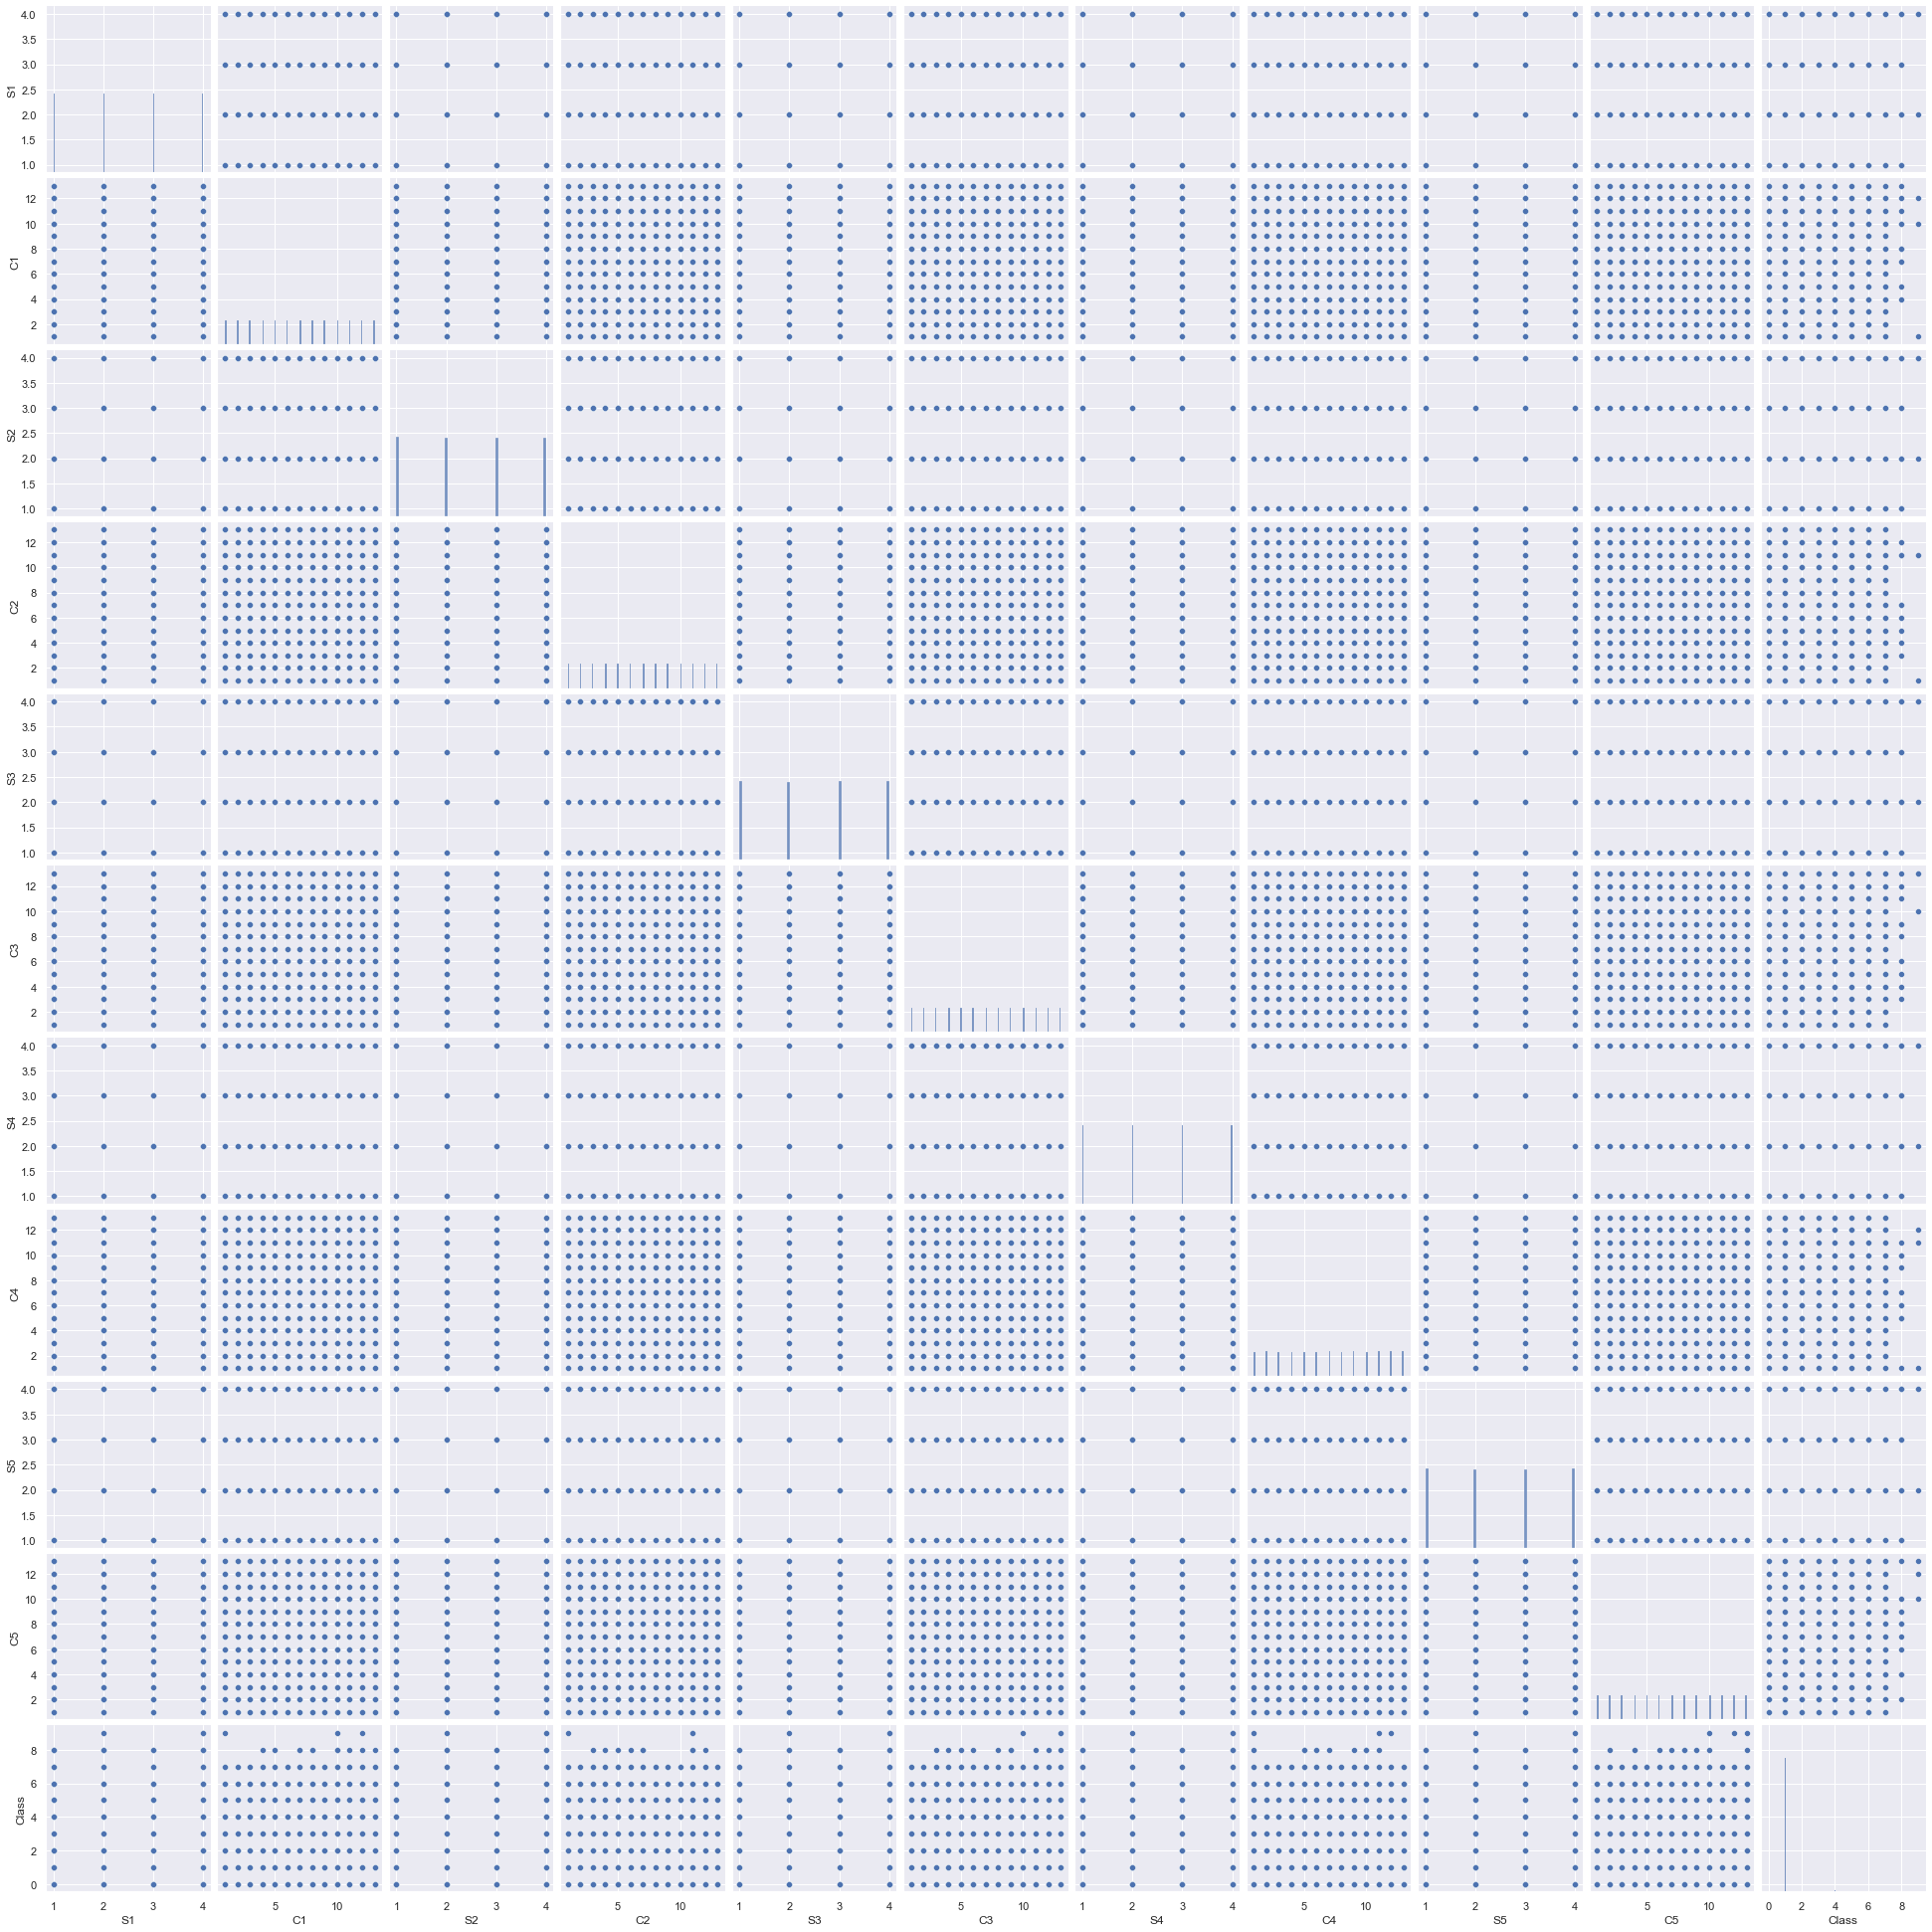

In [26]:
sns.pairplot(pokerdata_test[pokerdata_test.columns])

<AxesSubplot:>

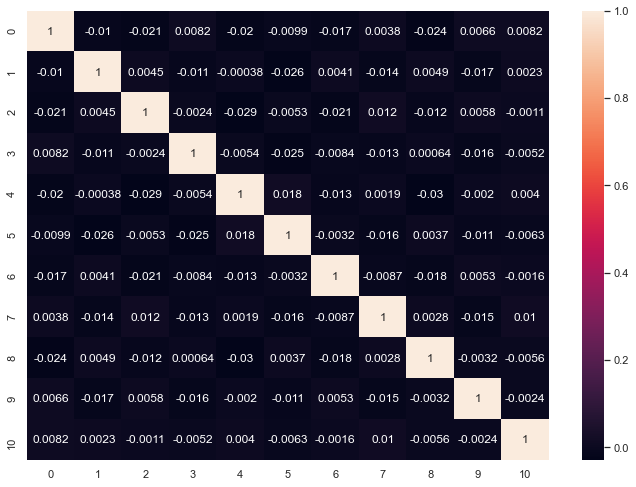

In [27]:
sns.heatmap(np.corrcoef(pokerdata_train.values.T),annot=True)

<AxesSubplot:>

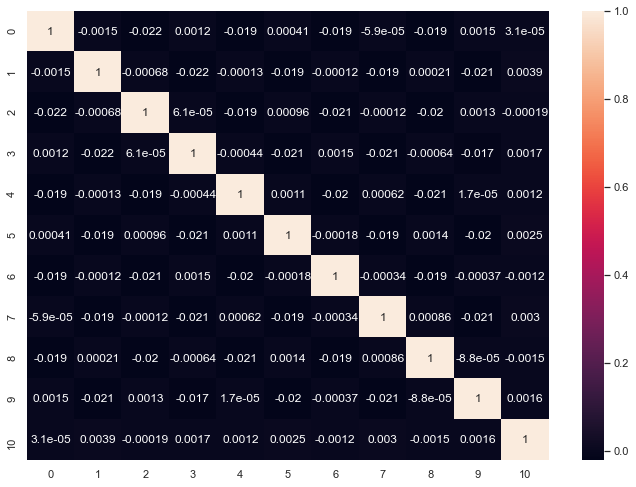

In [28]:
sns.heatmap(np.corrcoef(pokerdata_test.values.T),annot=True)

## Feature Extraction And Data Preprocessing


In [5]:
for i in pokerdata_train.columns:
    print(np.unique(pokerdata_train[i]))

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
for i in pokerdata_test.columns:
    print(np.unique(pokerdata_test[i]))

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
X_train = pokerdata_train.drop('Class', axis=1)
y_train = pokerdata_train['Class']
X_test = pokerdata_test.drop('Class', axis=1)
y_test = pokerdata_test['Class']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20008, 10) (5002, 10) (20008,) (5002,)


## Training Model And HyperParameter Tuning

In [8]:
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

Confusion Matrix (Training Set):
 [[9160  328  189   16    0    0  241   84    0    1]
 [7553  353  183   40    0    0  232   82    2    2]
 [ 835   51   25    9    0    0   36   13    1    0]
 [ 336   36    5   10    0    0   16    4    2    0]
 [  69    1    1    1    0    0    1    1    0    0]
 [  39    4    0    0    0    0    1    0    0    1]
 [  28    1    0    0    0    0    2    0    0    0]
 [   4    0    0    0    0    0    1    0    0    0]
 [   3    1    0    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0    0    0]]
Confusion Matrix (Test Set):
 [[2267   81   49    2    0    0   58   17    0    0]
 [1939   89   47    7    0    0   48   21    0    1]
 [ 206    9    9    3    0    0    6    3    0    0]
 [  91    7    2    2    0    0    2    0    0    0]
 [  19    0    0    0    0    0    0    0    0    0]
 [   8    1    0    0    0    0    0    0    0    0]
 [   3    2    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0   

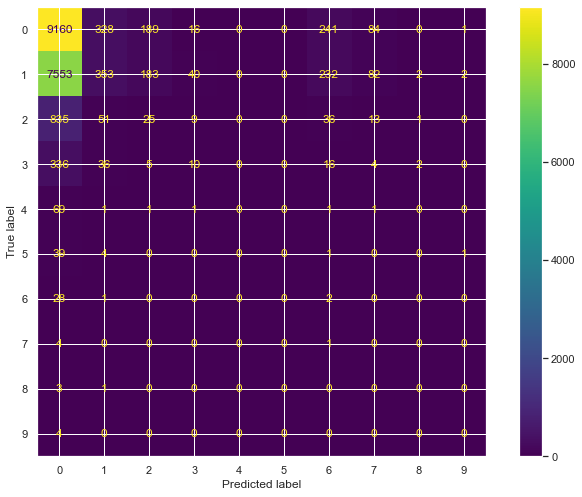

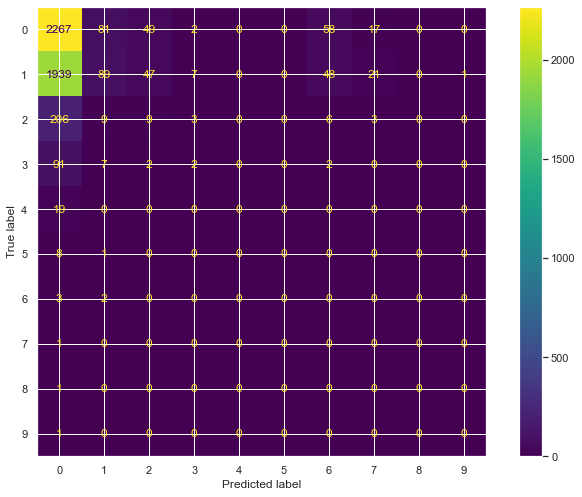

Accuracy for Training 47.73%
Accuracy for Testing 47.32%
Recall for Training 47.73%
Recall for Testing 47.32%
Precision Score for Training 45.24%
Precision Score for Testing 45.67%
F1-Score for Training 36.20%
F1-Score for Testing 35.58%


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
model = Perceptron()
model.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
cm_train = confusion_matrix(y_train, pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)
cm_test = confusion_matrix(y_test, pred_test)
print("Confusion Matrix (Test Set):\n", cm_test)
cm_train_viz = confusion_matrix(y_train, pred_train)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_viz)
disp1.plot()
cm_test_viz = confusion_matrix(y_test, pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_viz)
disp2.plot()
plt.show()
print("Accuracy for Training "+ "{:.2%}".format(accuracy_score(y_train,pred_train)))
print("Accuracy for Testing "+ "{:.2%}".format(accuracy_score(y_test,pred_test)))
print("Recall for Training "+ "{:.2%}".format(recall_score(y_train, pred_train, average='weighted')))
print("Recall for Testing "+ "{:.2%}".format(recall_score(y_test, pred_test, average='weighted')))
print("Precision Score for Training "+ "{:.2%}".format(precision_score(y_train, pred_train, average='weighted')))
print("Precision Score for Testing "+ "{:.2%}".format(precision_score(y_test, pred_test, average='weighted')))
print("F1-Score for Training "+ "{:.2%}".format(f1_score(y_train, pred_train, average='weighted')))
print("F1-Score for Testing "+ "{:.2%}".format(f1_score(y_test, pred_test, average='weighted')))
model_performance.loc['Perceptron'] = [accuracy_score(y_test,pred_test),recall_score(y_test, pred_test, average='weighted'),precision_score(y_test, pred_test, average='weighted'), f1_score(y_test, pred_test, average='weighted')]

C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix (Training Set):
 [[10019     0     0     0     0     0     0     0     0     0]
 [ 8447     0     0     0     0     0     0     0     0     0]
 [  970     0     0     0     0     0     0     0     0     0]
 [  409     0     0     0     0     0     0     0     0     0]
 [   74     0     0     0     0     0     0     0     0     0]
 [   45     0     0     0     0     0     0     0     0     0]
 [   31     0     0     0     0     0     0     0     0     0]
 [    5     0     0     0     0     0     0     0     0     0]
 [    4     0     0     0     0     0     0     0     0     0]
 [    4     0     0     0     0     0     0     0     0     0]]
Confusion Matrix (Test Set):
 [[2474    0    0    0    0    0    0    0    0    0]
 [2152    0    0    0    0    0    0    0    0    0]
 [ 236    0    0    0    0    0    0    0    0    0]
 [ 104    0    0    0    0    0    0    0    0    0]
 [  19    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    

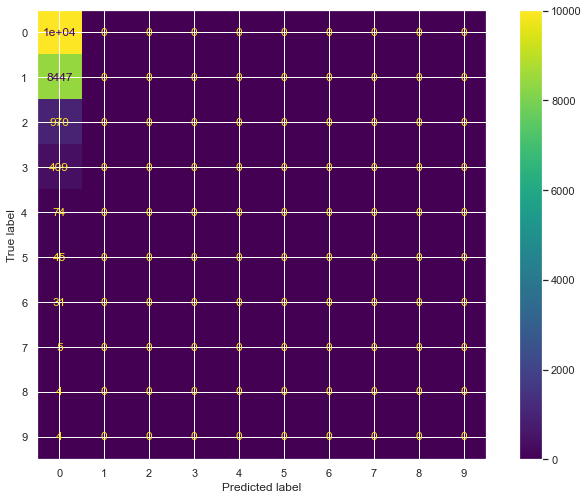

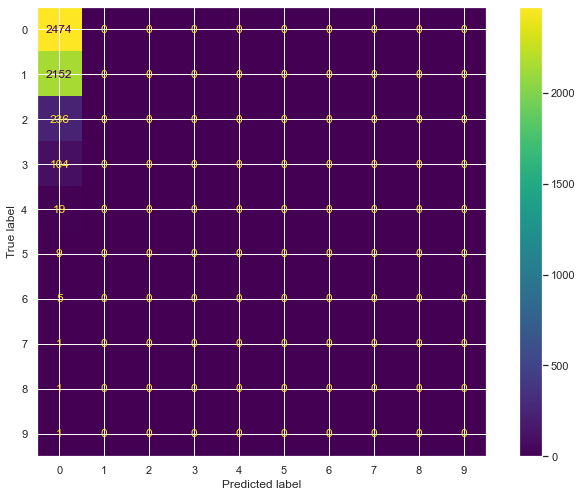

Accuracy for Training 50.07%
Accuracy for Testing 49.46%
Recall for Training 50.07%
Recall for Testing 49.46%
Precision Score for Training 25.08%
Precision Score for Testing 24.46%
F1-Score for Training 33.42%
F1-Score for Testing 32.74%


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
model = LogisticRegression(max_iter=3000).fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
cm_train = confusion_matrix(y_train, pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)
cm_test = confusion_matrix(y_test, pred_test)
print("Confusion Matrix (Test Set):\n", cm_test)
cm_train_viz = confusion_matrix(y_train, pred_train)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_viz)
disp1.plot()
cm_test_viz = confusion_matrix(y_test, pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_viz)
disp2.plot()
plt.show()
print("Accuracy for Training "+ "{:.2%}".format(accuracy_score(y_train,pred_train)))
print("Accuracy for Testing "+ "{:.2%}".format(accuracy_score(y_test,pred_test)))
print("Recall for Training "+ "{:.2%}".format(recall_score(y_train, pred_train, average='weighted')))
print("Recall for Testing "+ "{:.2%}".format(recall_score(y_test, pred_test, average='weighted')))
print("Precision Score for Training "+ "{:.2%}".format(precision_score(y_train, pred_train, average='weighted')))
print("Precision Score for Testing "+ "{:.2%}".format(precision_score(y_test, pred_test, average='weighted')))
print("F1-Score for Training "+ "{:.2%}".format(f1_score(y_train, pred_train, average='weighted')))
print("F1-Score for Testing "+ "{:.2%}".format(f1_score(y_test, pred_test, average='weighted')))
model_performance.loc['Logistic'] = [accuracy_score(y_test,pred_test),recall_score(y_test, pred_test, average='weighted'),precision_score(y_test, pred_test, average='weighted'), f1_score(y_test, pred_test, average='weighted')]

Confusion Matrix (Training Set):
 [[9484  535    0    0    0    0    0    0    0    0]
 [7564  883    0    0    0    0    0    0    0    0]
 [ 806  164    0    0    0    0    0    0    0    0]
 [ 347   62    0    0    0    0    0    0    0    0]
 [  50   24    0    0    0    0    0    0    0    0]
 [  42    3    0    0    0    0    0    0    0    0]
 [  26    5    0    0    0    0    0    0    0    0]
 [   3    2    0    0    0    0    0    0    0    0]
 [   3    1    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    1]]
Confusion Matrix (Test Set):
 [[2347  127    0    0    0    0    0    0    0    0]
 [1939  213    0    0    0    0    0    0    0    0]
 [ 201   35    0    0    0    0    0    0    0    0]
 [  78   26    0    0    0    0    0    0    0    0]
 [  15    4    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0    0    0]
 [   3    2    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0   

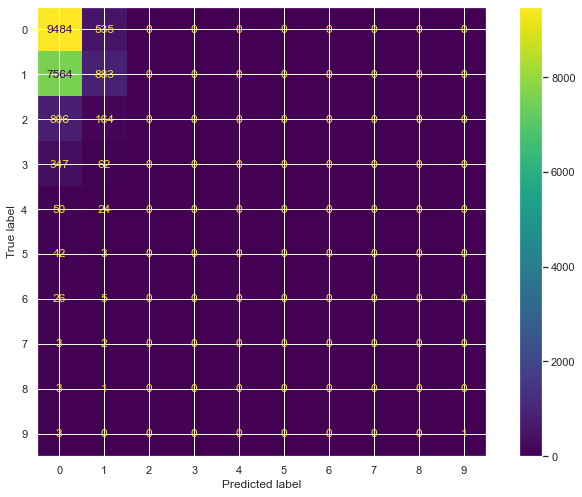

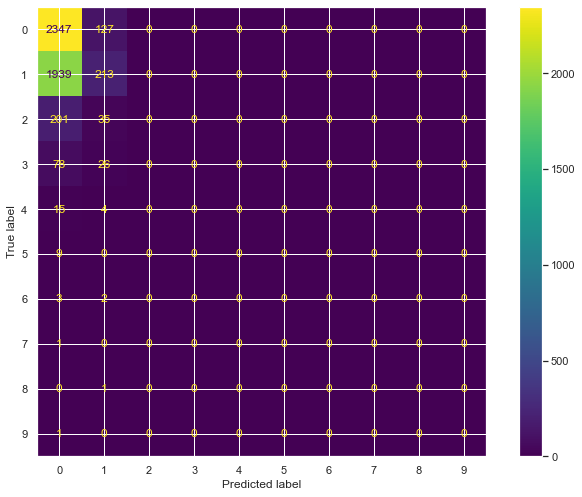

Accuracy for Training 51.82%
Accuracy for Testing 51.18%
Recall for Training 51.82%
Recall for Testing 51.18%
Precision Score for Training 48.13%
Precision Score for Testing 47.73%
F1-Score for Training 40.88%
F1-Score for Testing 40.01%


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
model = SVC(kernel="poly")
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
cm_train = confusion_matrix(y_train, pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)
cm_test = confusion_matrix(y_test, pred_test)
print("Confusion Matrix (Test Set):\n", cm_test)
cm_train_viz = confusion_matrix(y_train, pred_train)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_viz)
disp1.plot()
cm_test_viz = confusion_matrix(y_test, pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_viz)
disp2.plot()
plt.show()
print("Accuracy for Training "+ "{:.2%}".format(accuracy_score(y_train,pred_train)))
print("Accuracy for Testing "+ "{:.2%}".format(accuracy_score(y_test,pred_test)))
print("Recall for Training "+ "{:.2%}".format(recall_score(y_train, pred_train, average='weighted')))
print("Recall for Testing "+ "{:.2%}".format(recall_score(y_test, pred_test, average='weighted')))
print("Precision Score for Training "+ "{:.2%}".format(precision_score(y_train, pred_train, average='weighted')))
print("Precision Score for Testing "+ "{:.2%}".format(precision_score(y_test, pred_test, average='weighted')))
print("F1-Score for Training "+ "{:.2%}".format(f1_score(y_train, pred_train, average='weighted')))
print("F1-Score for Testing "+ "{:.2%}".format(f1_score(y_test, pred_test, average='weighted')))
model_performance.loc['SVMPoly'] = [accuracy_score(y_test,pred_test),recall_score(y_test, pred_test, average='weighted'),precision_score(y_test, pred_test, average='weighted'), f1_score(y_test, pred_test, average='weighted')]

Confusion Matrix (Training Set):
 [[10019     0     0     0     0     0     0     0     0     0]
 [ 8447     0     0     0     0     0     0     0     0     0]
 [  970     0     0     0     0     0     0     0     0     0]
 [  409     0     0     0     0     0     0     0     0     0]
 [   74     0     0     0     0     0     0     0     0     0]
 [   45     0     0     0     0     0     0     0     0     0]
 [   31     0     0     0     0     0     0     0     0     0]
 [    5     0     0     0     0     0     0     0     0     0]
 [    4     0     0     0     0     0     0     0     0     0]
 [    4     0     0     0     0     0     0     0     0     0]]
Confusion Matrix (Test Set):
 [[2474    0    0    0    0    0    0    0    0    0]
 [2152    0    0    0    0    0    0    0    0    0]
 [ 236    0    0    0    0    0    0    0    0    0]
 [ 104    0    0    0    0    0    0    0    0    0]
 [  19    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    

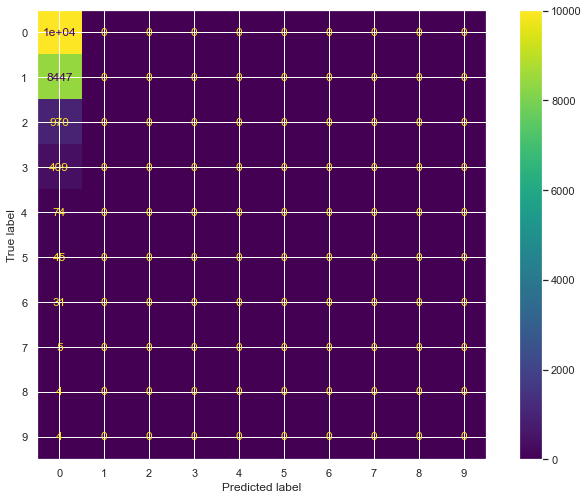

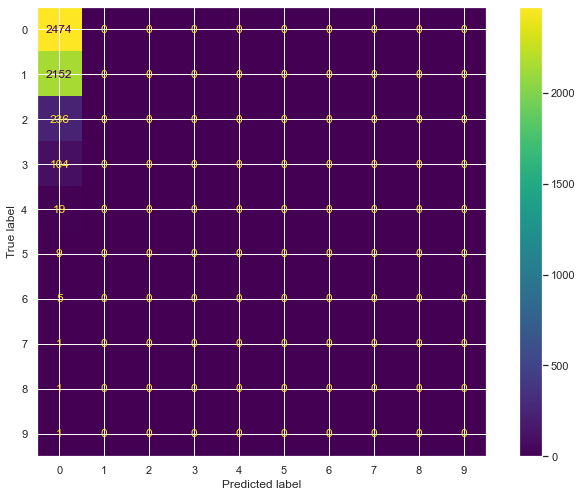

Accuracy for Training 50.07%
Accuracy for Testing 49.46%
Recall for Training 50.07%
Recall for Testing 49.46%
Precision Score for Training 25.08%
Precision Score for Testing 24.46%
F1-Score for Training 33.42%
F1-Score for Testing 32.74%


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
model = SVC(kernel="linear")
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
cm_train = confusion_matrix(y_train, pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)
cm_test = confusion_matrix(y_test, pred_test)
print("Confusion Matrix (Test Set):\n", cm_test)
cm_train_viz = confusion_matrix(y_train, pred_train)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_viz)
disp1.plot()
cm_test_viz = confusion_matrix(y_test, pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_viz)
disp2.plot()
plt.show()
print("Accuracy for Training "+ "{:.2%}".format(accuracy_score(y_train,pred_train)))
print("Accuracy for Testing "+ "{:.2%}".format(accuracy_score(y_test,pred_test)))
print("Recall for Training "+ "{:.2%}".format(recall_score(y_train, pred_train, average='weighted')))
print("Recall for Testing "+ "{:.2%}".format(recall_score(y_test, pred_test, average='weighted')))
print("Precision Score for Training "+ "{:.2%}".format(precision_score(y_train, pred_train, average='weighted')))
print("Precision Score for Testing "+ "{:.2%}".format(precision_score(y_test, pred_test, average='weighted')))
print("F1-Score for Training "+ "{:.2%}".format(f1_score(y_train, pred_train, average='weighted')))
print("F1-Score for Testing "+ "{:.2%}".format(f1_score(y_test, pred_test, average='weighted')))
model_performance.loc['SVMLinear'] = [accuracy_score(y_test,pred_test),recall_score(y_test, pred_test, average='weighted'),precision_score(y_test, pred_test, average='weighted'), f1_score(y_test, pred_test, average='weighted')]

Confusion Matrix (Training Set):
 [[8202 1817    0    0    0    0    0    0    0    0]
 [5092 3355    0    0    0    0    0    0    0    0]
 [ 468  502    0    0    0    0    0    0    0    0]
 [ 132  277    0    0    0    0    0    0    0    0]
 [   0   74    0    0    0    0    0    0    0    0]
 [  41    4    0    0    0    0    0    0    0    0]
 [  13   18    0    0    0    0    0    0    0    0]
 [   0    5    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0]]
Confusion Matrix (Test Set):
 [[2029  445    0    0    0    0    0    0    0    0]
 [1340  812    0    0    0    0    0    0    0    0]
 [ 129  107    0    0    0    0    0    0    0    0]
 [  26   78    0    0    0    0    0    0    0    0]
 [   0   19    0    0    0    0    0    0    0    0]
 [   6    3    0    0    0    0    0    0    0    0]
 [   2    3    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0   

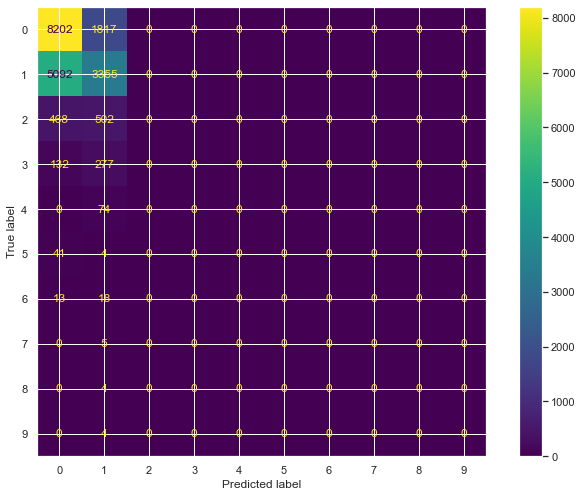

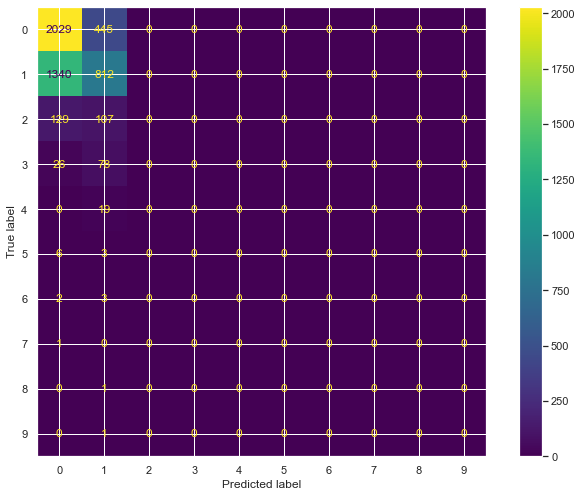

Accuracy for Training 57.76%
Accuracy for Testing 56.80%
Recall for Training 57.76%
Recall for Testing 56.80%
Precision Score for Training 52.82%
Precision Score for Testing 52.19%
F1-Score for Training 53.80%
F1-Score for Testing 52.71%


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
model = SVC(kernel="rbf")
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
cm_train = confusion_matrix(y_train, pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)
cm_test = confusion_matrix(y_test, pred_test)
print("Confusion Matrix (Test Set):\n", cm_test)
cm_train_viz = confusion_matrix(y_train, pred_train)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_viz)
disp1.plot()
cm_test_viz = confusion_matrix(y_test, pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_viz)
disp2.plot()
plt.show()
print("Accuracy for Training "+ "{:.2%}".format(accuracy_score(y_train,pred_train)))
print("Accuracy for Testing "+ "{:.2%}".format(accuracy_score(y_test,pred_test)))
print("Recall for Training "+ "{:.2%}".format(recall_score(y_train, pred_train, average='weighted')))
print("Recall for Testing "+ "{:.2%}".format(recall_score(y_test, pred_test, average='weighted')))
print("Precision Score for Training "+ "{:.2%}".format(precision_score(y_train, pred_train, average='weighted')))
print("Precision Score for Testing "+ "{:.2%}".format(precision_score(y_test, pred_test, average='weighted')))
print("F1-Score for Training "+ "{:.2%}".format(f1_score(y_train, pred_train, average='weighted')))
print("F1-Score for Testing "+ "{:.2%}".format(f1_score(y_test, pred_test, average='weighted')))
model_performance.loc['SVMRbf'] = [accuracy_score(y_test,pred_test),recall_score(y_test, pred_test, average='weighted'),precision_score(y_test, pred_test, average='weighted'), f1_score(y_test, pred_test, average='weighted')]

Confusion Matrix (Training Set):
 [[10019     0     0     0     0     0     0     0     0     0]
 [ 8368    79     0     0     0     0     0     0     0     0]
 [  948    22     0     0     0     0     0     0     0     0]
 [  399    10     0     0     0     0     0     0     0     0]
 [   74     0     0     0     0     0     0     0     0     0]
 [   45     0     0     0     0     0     0     0     0     0]
 [   31     0     0     0     0     0     0     0     0     0]
 [    5     0     0     0     0     0     0     0     0     0]
 [    4     0     0     0     0     0     0     0     0     0]
 [    4     0     0     0     0     0     0     0     0     0]]
Confusion Matrix (Test Set):
 [[2474    0    0    0    0    0    0    0    0    0]
 [2145    7    0    0    0    0    0    0    0    0]
 [ 232    4    0    0    0    0    0    0    0    0]
 [ 102    2    0    0    0    0    0    0    0    0]
 [  19    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    

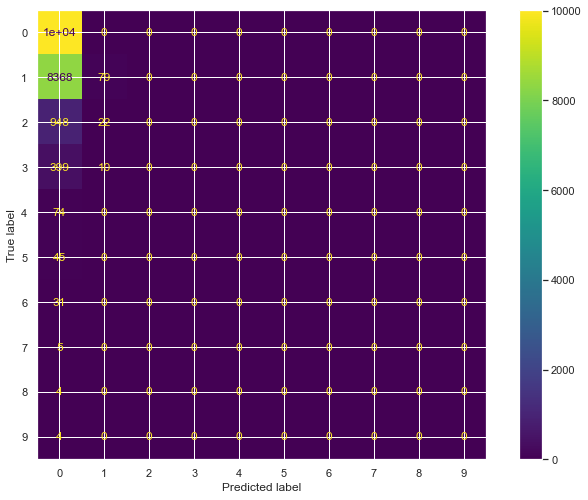

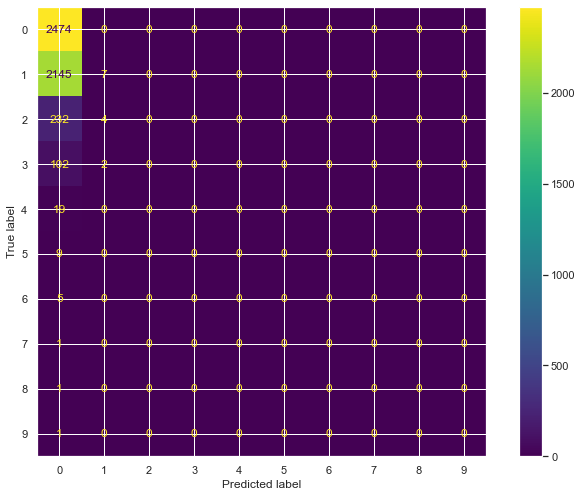

Accuracy for Training 50.47%
Accuracy for Testing 49.60%
Recall for Training 50.47%
Recall for Testing 49.60%
Precision Score for Training 55.26%
Precision Score for Testing 47.69%
F1-Score for Training 34.32%
F1-Score for Testing 33.07%


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
cm_train = confusion_matrix(y_train, pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)
cm_test = confusion_matrix(y_test, pred_test)
print("Confusion Matrix (Test Set):\n", cm_test)
cm_train_viz = confusion_matrix(y_train, pred_train)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_viz)
disp1.plot()
cm_test_viz = confusion_matrix(y_test, pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_viz)
disp2.plot()
plt.show()
print("Accuracy for Training "+ "{:.2%}".format(accuracy_score(y_train,pred_train)))
print("Accuracy for Testing "+ "{:.2%}".format(accuracy_score(y_test,pred_test)))
print("Recall for Training "+ "{:.2%}".format(recall_score(y_train, pred_train, average='weighted')))
print("Recall for Testing "+ "{:.2%}".format(recall_score(y_test, pred_test, average='weighted')))
print("Precision Score for Training "+ "{:.2%}".format(precision_score(y_train, pred_train, average='weighted')))
print("Precision Score for Testing "+ "{:.2%}".format(precision_score(y_test, pred_test, average='weighted')))
print("F1-Score for Training "+ "{:.2%}".format(f1_score(y_train, pred_train, average='weighted')))
print("F1-Score for Testing "+ "{:.2%}".format(f1_score(y_test, pred_test, average='weighted')))
model_performance.loc['Decision Tree'] = [accuracy_score(y_test,pred_test),recall_score(y_test, pred_test, average='weighted'),precision_score(y_test, pred_test, average='weighted'), f1_score(y_test, pred_test, average='weighted')]

Confusion Matrix (Training Set):
 [[8297 1717    3    2    0    0    0    0    0    0]
 [2927 5484   31    5    0    0    0    0    0    0]
 [ 417  439  112    2    0    0    0    0    0    0]
 [ 102  267   18   21    1    0    0    0    0    0]
 [  15   49    5    1    4    0    0    0    0    0]
 [  38    7    0    0    0    0    0    0    0    0]
 [   7   19    5    0    0    0    0    0    0    0]
 [   0    5    0    0    0    0    0    0    0    0]
 [   0    3    1    0    0    0    0    0    0    0]
 [   2    2    0    0    0    0    0    0    0    0]]
Confusion Matrix (Test Set):
 [[1733  740    1    0    0    0    0    0    0    0]
 [1162  965   20    5    0    0    0    0    0    0]
 [ 104  126    5    1    0    0    0    0    0    0]
 [  23   74    5    1    1    0    0    0    0    0]
 [   6   13    0    0    0    0    0    0    0    0]
 [   7    2    0    0    0    0    0    0    0    0]
 [   1    3    0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0   

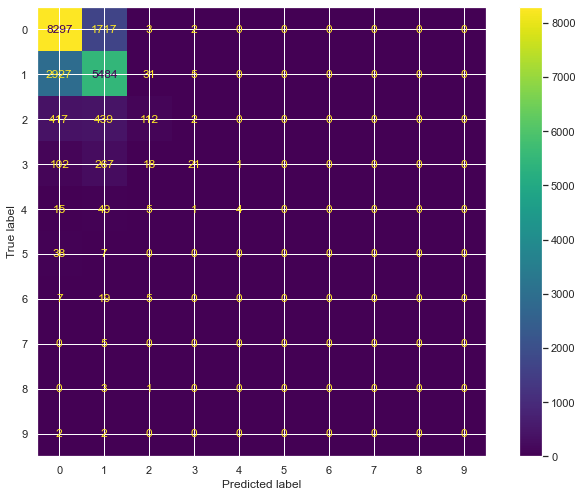

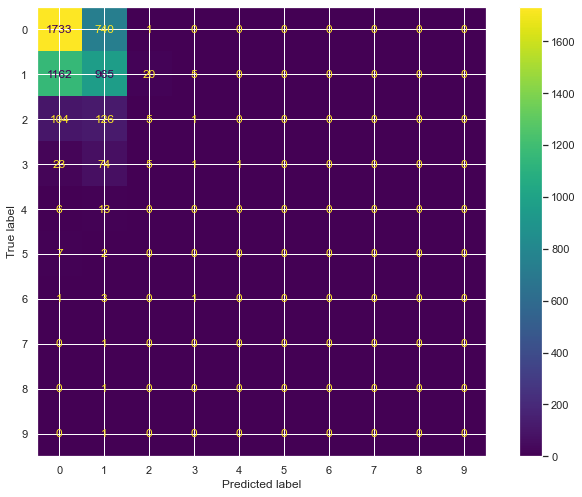

Accuracy for Training 69.56%
Accuracy for Testing 54.06%
Recall for Training 69.56%
Recall for Testing 54.06%
Precision Score for Training 68.95%
Precision Score for Testing 50.81%
F1-Score for Training 67.42%
F1-Score for Testing 51.69%


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
cm_train = confusion_matrix(y_train, pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)
cm_test = confusion_matrix(y_test, pred_test)
print("Confusion Matrix (Test Set):\n", cm_test)
cm_train_viz = confusion_matrix(y_train, pred_train)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_viz)
disp1.plot()
cm_test_viz = confusion_matrix(y_test, pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_viz)
disp2.plot()
plt.show()
print("Accuracy for Training "+ "{:.2%}".format(accuracy_score(y_train,pred_train)))
print("Accuracy for Testing "+ "{:.2%}".format(accuracy_score(y_test,pred_test)))
print("Recall for Training "+ "{:.2%}".format(recall_score(y_train, pred_train, average='weighted')))
print("Recall for Testing "+ "{:.2%}".format(recall_score(y_test, pred_test, average='weighted')))
print("Precision Score for Training "+ "{:.2%}".format(precision_score(y_train, pred_train, average='weighted')))
print("Precision Score for Testing "+ "{:.2%}".format(precision_score(y_test, pred_test, average='weighted')))
print("F1-Score for Training "+ "{:.2%}".format(f1_score(y_train, pred_train, average='weighted')))
print("F1-Score for Testing "+ "{:.2%}".format(f1_score(y_test, pred_test, average='weighted')))
model_performance.loc['KNeighbor'] = [accuracy_score(y_test,pred_test),recall_score(y_test, pred_test, average='weighted'),precision_score(y_test, pred_test, average='weighted'), f1_score(y_test, pred_test, average='weighted')]

In [26]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score
Perceptron,47.32%,47.32%,45.67%,35.58%
Logistic,49.46%,49.46%,24.46%,32.74%
SVMPoly,51.18%,51.18%,47.73%,40.01%
SVMLinear,49.46%,49.46%,24.46%,32.74%
SVMRbf,56.80%,56.80%,52.19%,52.71%
Decision Tree,49.60%,49.60%,47.69%,33.07%
KNeighbor,54.06%,54.06%,50.81%,51.69%
